<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#We-All-Make-Mistakes" data-toc-modified-id="We-All-Make-Mistakes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>We All Make Mistakes</a></span><ul class="toc-item"><li><span><a href="#Getting-it-Right-vs-Getting-it-Wrong" data-toc-modified-id="Getting-it-Right-vs-Getting-it-Wrong-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Getting it Right vs Getting it Wrong</a></span></li><li><span><a href="#False-Positives---Type-1-Errors" data-toc-modified-id="False-Positives---Type-1-Errors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>False Positives - Type 1 Errors</a></span></li><li><span><a href="#False-Negatives---Type-2-Errors" data-toc-modified-id="False-Negatives---Type-2-Errors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>False Negatives - Type 2 Errors</a></span></li><li><span><a href="#Visualizing-The-Errors" data-toc-modified-id="Visualizing-The-Errors-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizing The Errors</a></span></li></ul></li><li><span><a href="#When-Things-Aren't-Normal:-$t$-Tests" data-toc-modified-id="When-Things-Aren't-Normal:-$t$-Tests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>When Things Aren't Normal: $t$-Tests</a></span><ul class="toc-item"><li><span><a href="#$z$-tests-vs-$t$-tests" data-toc-modified-id="$z$-tests-vs-$t$-tests-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>$z$-tests vs $t$-tests</a></span></li><li><span><a href="#Compare-and-contrast-$z$-tests-and-$t$-tests." data-toc-modified-id="Compare-and-contrast-$z$-tests-and-$t$-tests.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compare and contrast $z$-tests and $t$-tests.</a></span></li><li><span><a href="#Performing-a-$t$-Test" data-toc-modified-id="Performing-a-$t$-Test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Performing a $t$-Test</a></span><ul class="toc-item"><li><span><a href="#An-Alternative-Method-in-Making-a-Decision" data-toc-modified-id="An-Alternative-Method-in-Making-a-Decision-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>An Alternative Method in Making a Decision</a></span></li></ul></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises</a></span><ul class="toc-item"><li><span><a href="#Gotta-Have-My-Coffee!-☕️" data-toc-modified-id="Gotta-Have-My-Coffee!-☕️-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gotta Have My Coffee! ☕️</a></span></li><li><span><a href="#Gotta-Have-My-Pants!-👖" data-toc-modified-id="Gotta-Have-My-Pants!-👖-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gotta Have My Pants! 👖</a></span></li><li><span><a href="#Gotta-Have-My-Food-Delivered!-🚚" data-toc-modified-id="Gotta-Have-My-Food-Delivered!-🚚-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gotta Have My Food Delivered! 🚚</a></span></li></ul></li><li><span><a href="#Level-Up:-More-practice-problems!" data-toc-modified-id="Level-Up:-More-practice-problems!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Level Up: More practice problems!</a></span></li><li><span><a href="#Level-Up:--Two-sample-$t$-tests" data-toc-modified-id="Level-Up:--Two-sample-$t$-tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level Up:  Two-sample $t$-tests</a></span></li></ul></div>

In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Objectives

- Understand how type 1 & type 2 errors can be made in hypothesis tests
- Perform a Student's t-test and interpret the results

# We All Make Mistakes

Statistics is a field of imperfect knowledge: we don't know the **_truth_**, we use what we know.

We make mistakes ¯\\\_(ツ)\_/¯ <!--markdown shrug-->

But it's important to know what _kind of mistakes_ we're making in our process and recognize how _frequently_ we might make those mistakes.

## Getting it Right vs Getting it Wrong

It would help if we go over some terminology to help us discuss this types of errors.

----------------------------------------

When we get it **right** we have **true positives** & **true negatives**. These correspond with _rejecting the null hypothesis_ and _failing to reject the null hypothesis_.

In either situation, it means our conclusion agrees with the "truth".

----------------------------------------

When we get it **wrong** we either have a **false positive** or a **false negative**. These are the errors we care about.

## False Positives - Type 1 Errors

**False positives** are **type 1 errors** and occur when we _reject the null hypothesis_ (favoring the alternative hypothesis) but the "truth" is that we should have _failed to reject_ (favoring the null hypothesis).

We can get these errors by random chance and are associated with _finding an effect_ when one doesn't exist. We can expect this to happen if we perform many tests where there is no effect.

<img src='https://imgs.xkcd.com/comics/significant.png' width=400px/>

So what's a decent tolerance of error? Usually at rate between $1\%$ and $5\%$ but it depends on the specific experiment.

We actually define our tolerance with something we're already familiar with, the significance level $\alpha$

## False Negatives - Type 2 Errors

**False negatives** are **type 2 errors** and occur when we _fail to reject the null hypothesis_ (favoring the null hypothesis) but the "truth" is that we should have _rejected the hypothesis_ (favoring the alternative hypothesis).

This can happen again randomly but usually a symptom of not having a "good enough" experiment to notice an effect. We're likely to fail to reject $H_0$ if we don't have enough samples and/or the effect is relatively small.

This error can be denoted with $\beta$ but typically it's talked about in terms of **statistical power** ($1-\beta$) which we'll see later. Note that we want $\beta$ to be small, but statistical power to be high (they're complements of another)

Generally, we want our false negative rate $\beta$ to be about $20\%$ but again it depends on the application.

## Visualizing The Errors

We can think of a hypothesis test as comparing two normal distributions (or $t$-distributions or whichever test we're doing). 

There's the sample's distribution and the comparison's distribution given by the null hypothesis (which is the population in a one-sample test).

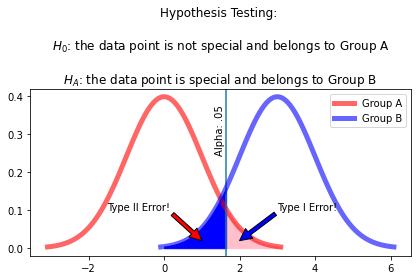

In [2]:
# Visulization of two samples being compared with one another
fig, ax = plt.subplots()

y = np.linspace(stats.norm(0, 1).ppf(0.001),
             stats.norm(0, 1).ppf(0.999), 100)

alpha = stats.norm(0, 1).ppf(0.95)


ax.plot(y, stats.norm(0, 1).pdf(y), 'r-', lw=5, alpha=0.6, label='Group A')
ax.axvline(alpha)

px = np.arange(stats.norm(0, 1).ppf(0.95), stats.norm(0, 1).ppf(0.999), 0.001)
ax.fill_between(px, stats.norm(0, 1).pdf(px), color = 'pink')



x = np.linspace(stats.norm(3, 1).ppf(0.001),
             stats.norm(3, 1).ppf(0.999), 100)

ax.plot(x, stats.norm(3, 1).pdf(x), 'b-', lw=5, alpha=0.6, label='Group B')


px = np.arange(stats.norm(0, 1).ppf(0.5),stats.norm(0, 1).ppf(0.95), 0.001)
ax.fill_between(px, stats.norm(3, 1).pdf(px), color='blue')
ax.legend(loc='upper right')

ax.set_title("""Hypothesis Testing: \n
$H_0$: the data point is not special and belongs to Group A \n
$H_A$: the data point is special and belongs to Group B """)
ax.text(1.35, 0.25, 'Alpha: .05', rotation=90)

ax.annotate('Type I Error!', xy=(2, 0.02),
            xytext=(3, 0.1), arrowprops={'facecolor': 'blue'})
ax.annotate('Type II Error!', xy=(1, 0.02),
            xytext=(-1.5, 0.1), arrowprops={'facecolor': 'red'})

plt.tight_layout()

We can visualize these two distributions as where we might expect our sample mean to be measured at.

Sometimes we might measure an extreme value in our first sample which will be interpreted as a small p-value (too weird to be part of the comparison distribution) resulting into a _type 1 error_.

# When Things Aren't Normal: $t$-Tests

## $z$-tests vs $t$-tests

We'll typically assume that our continuous variables come from normal distributions. But if we have a small sample size or don't know the population standard deviation, we have to make a *correction* to  the normal distribution. This is what the $t$-test effectively does for us by using a $t$-distribution over the normal distribution.

As we saw from a previous lecture, the $t$-distribution changes based on the degrees of freedom (number of data point in the sample). As the number of points increase, we approach the normal distribution.

<img src="./images/z_or_t_test.png" width="500">

**So what's the difference?** → A $t$-test is like a modified $z$-test. 

> **$t$-test**:
> 
> - Calculate the **$t$-statistic** using the sample's standard deviation $s$:
> $$\large t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
> - We calculate the p-value from the **$t$-distribution**

> **$z$-test**:
> 
> - Calculate the **$z$-statistic** using the populations standard deviation $\sigma$:
> $$\large z = \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$$
> - We calculate the p-value from the **normal distribution**


<img src="images/img5.png" width="500">

## Compare and contrast $z$-tests and $t$-tests. 

In both cases, it is assumed that the samples are normally distributed. 

$t$-distributions have more probability in the tails. As the sample size increases, this decreases and the t distribution more closely resembles the $z$, or standard normal, distribution. By sample size $n = 1000$ they are virtually indistinguishable from each other. 

As the degrees of freedom go up, the $t$-distribution gets closer to the normal curve.

After calculating our $t$-stat, we compare it against our $t$-critical value determined by our predetermined alpha and the degrees of freedom.

Degrees of freedom = n - 1

In [3]:
#help(stats.ttest_1samp)

## Performing a $t$-Test

> **Scenario**
>
> - We are told that African elephants have weights distributed normally around a mean of $9000$ lbs. 
> - Pachyderm Adventures has recently measured the weights of $20$ African elephants in Gabon  
> - This group of Gabonese elephants were measured to have an average weight at $8562$ lbs. 
>
> The claim is that these Gabonese elephants are significantly different. Let's find out!

Because the sample size is small, we need to use a one sample $t$-test. 



$H_0$: _There is no difference between the Gabonese elephants and the African elephants population_

$H_1$: _There is a difference between the Gabonese elephants and the African elephants population_

Let's define our $\alpha$ to be $0.05$

In [4]:
# We're given these values from the sample
gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601, 
        8559, 8228, 8474, 8708, 8128
])

In [5]:
print(f'Sample mean: {np.mean(gab):.1f}')

Sample mean: 8562.0


In [6]:
print(f'Sample std: {np.std(gab):.1f}')

Sample std: 288.7


In [7]:
# Using Python to perform test
result = stats.ttest_1samp(gab, 9000)
t_stat, p_value = result
result

Ttest_1sampResult(statistic=-6.614120615780001, pvalue=2.498214901380137e-06)

So, yes, we can very confidently reject our null hypothesis since the p-value is smaller than our $\alpha$.

### An Alternative Method in Making a Decision

We used SciPy above to calculate our $t$-value and ultimately our p-value from the $t$-distribution. 

Alternatively, we can convert our significance level $\alpha$ using the $t$-distribution to get our **critical value $t^*$**. We then can compare $t^*$ with our $t$-statistic to determine if it's significant.

In [8]:
# Let's continue to assume our alpha is 0.05
x_bar = 8562
mu = 9000
sample_std = np.std(gab)
n = 20

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n-1))
t_stat

-6.614120615780003

In [9]:
# Calculate our t-critical value t*
stats.t.ppf(0.05, n-1)

-1.7291328115213678

In [10]:
stats.t.ppf(0.025, n-1)

-2.0930240544082634

We can again confidently reject our null hypothesis since the absolute value of our $t$-statistic is larger than that of our critical value $t^*$.

# Exercises

## Gotta Have My Coffee! ☕️

A coffee shop relocates from Manhattan to Brooklyn and wants to make sure that all lattes are consistent before and after their move. They buy a new machine and hire a new barista. In Manhattan, lattes are made with 4 oz of espresso. A random sample of 25 lattes made in their new store in Brooklyn shows a mean of 4.6 oz and standard deviation of 0.22 oz. Are their lattes different now that they've relocated to Brooklyn? Use a significance level of $\alpha = 0.01$.

**State the null and alternative hypotheses**

In [11]:
# Your Answer Here
# Ho: no differnce betwen the two locations

**Perform the test.**

In [12]:
n = 24
mu = 4
x_bar = 4.6
sample_std = .22
alpha = .01

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n-1))
t_stat

13.07954051812559

**Make a decision**.

## Gotta Have My Pants! 👖

I'm buying jeans from Pants-a-torium. I know nothing about their inventory other than prices after looking at some random jean prices: 

``` python
[20, 30, 30, 50, 75, 25, 30, 30, 40, 80]
```
However, I know that my typical pants store (Pants-R-Us) sells jeans at an average price of \\$58 with a standard deviation of \\$18. (Yes, I do descriptive statistics while I shop. Why do you ask?)

Should I go just to one store for a less expensive pair of jeans? I'm pretty apprehensive about my decision, so $\alpha = 0.1$.

**State the null and alternative hypotheses**

In [13]:
pants_prices = [20, 30, 30, 50, 75, 25, 30, 30, 40, 80]
#Ho = Pants-a-torium is not cheaper than Pants-R-Us
#Ha = Pants-a-torium is cheaper than Pants-R-Us

**Perform the test.**

In [14]:
n = 10
mu = 58
x_bar = np.mean(pants_prices)
sample_std = 18
alpha = .1

In [15]:
result = stats.ttest_1samp(pants_prices, 58)
result

Ttest_1sampResult(statistic=-2.56934288148538, pvalue=0.03022035629578255)

In [16]:
t_stat, p_value = result
t_stat, p_value

(-2.56934288148538, 0.03022035629578255)

In [17]:
stats.t.ppf(.1, n-1)

-1.3830287383964925

**Make a decision.**

In [18]:
# we shoud reject the null because the ab value of the t stat was greater than the absolute value of the ppf 
# looking at your p stat .03 comparing it to the alpha

## Gotta Have My Food Delivered! 🚚

You measure the delivery times of ten different restaurants in two different neighborhoods. You want to know if restaurants in the different neighborhoods have the same delivery times. Set your significance threshold to 0.05. 

We measured this for neighborhood A: 

``` python
delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
```

For neighborhood B, someone already reported the values as a mean time of 26.8 minutes and a standard deviation of 2.6 minutes.


**State the null and alternative hypotheses.**

Null: There is no difference

Alt: There is a difference

**Perform the test.**

In [19]:
#This is a TWO-SAMPLE problem. So we'll use stats.ttest_ind_from_stats(). 
#The two sets don't have exactly the same variance, 
#so we'll perform Welch's test by setting the equal_var parameter to False.

delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
n_1 = len(delivery_times_A)
x_bar_1 = np.mean(delivery_times_A)
sample_std_1 = np.std(delivery_times_A)

n_2 = 10
x_bar_2 = 26.8
sample_std_2 = 2.6

print(np.var(delivery_times_A))
print(sample_std_2**2)

stats.ttest_ind_from_stats(mean1=x_bar_1, std1=sample_std_1, nobs1=n_1, mean2=x_bar_2, std2=sample_std_2, nobs2=n_2, equal_var=False)

6.166099999999996
6.760000000000001


Ttest_indResult(statistic=1.8206924435070326, pvalue=0.08535597189429299)

**Make a decision.**

# Level Up: More practice problems!

1. A rental car company claims the mean time to rent a car on their website is 60 seconds with a standard deviation of 30 seconds. A random sample of 36 customers attempted to rent a car on the website. The mean time to rent was 75 seconds. Is this enough evidence to contradict the company's claim at a significance level of $\alpha = 0.05$? 

Null hypothesis:

Alternative hypothesis:


In [20]:
# one-sample z-test 


Reject?:

2. Consider the gain in weight (in grams) of 19 female rats between 28 and 84 days after birth. 

Twelve rats were fed on a high-protein diet and seven rats were fed on a low-protein diet.

``` python
high_protein = [134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123]
low_protein = [70, 118, 101, 85, 107, 132, 94]
```

Is there any difference in the weight gain of rats fed on high protein diet vs low protein diet? It's OK to assume equal sample variances. 

Null and alternative hypotheses? 

> null: 

> alternative: 

What kind of test should we perform and why? 

> Test:

Perform the test. Do we reject the null hypothesis?

**What if we wanted to test if the rats who ate a high-protein diet gained *more* weight than those who ate a low-protein diet?**

Null:

alternative:

Kind of test? 

Critical test statistic value? 

Can we reject?

# Level Up:  Two-sample $t$-tests

Sometimes, we are interested in determining whether two population means are equal. In this case, we use two-sample $t$-tests.

There are two types of two-sample t-tests: **paired** and **independent** (unpaired) tests. 

What's the difference?  

**Paired tests**: How is a sample affected by a certain treatment? The individuals in the sample remain the same and you compare how they change after treatment. 

**Independent tests**: When we compare two different, unrelated samples to each other, we use an independent (or unpaired) two-sample t-test.

The test statistic for an unpaired two-sample t-test is slightly different than the test statistic for the one-sample $t$-test. 

Assuming equal variances, the test statistic for a two-sample $t$-test is given by: 

$$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$$

where $s^2$ is the pooled sample variance, 

$$ s^2 = \frac{\sum_{i=1}^{n_1} \left(x_i - \bar{x_1}\right)^2 + \sum_{j=1}^{n_2} \left(x_j - \bar{x_2}\right)^2 }{n_1 + n_2 - 2} $$

Here, $n_1$ is the sample size of sample 1 and $n_2$ is the sample size of sample 2. 

An independent two-sample $t$-test for samples of size $n_1$ and $n_2$ has $(n_1 + n_2 - 2)$ degrees of freedom. 

Now let's say we want to compare our Gabonese elephants to a sample of elephants from Kenya. 

In [21]:
ken = [8762, 8880, 8743, 8901,
        8252, 8966, 8369, 9001,
         8857, 8147, 8927, 9005,
         9083, 8477, 8760, 8915,
         8927, 8829, 8579, 9002]


print(np.std(ken))
print(np.std(gab))

259.79701691897856
288.65481114992696


In [22]:
# so

x_1 = np.mean(gab)
x_2 = np.mean(ken)
s_1_2 = np.var(gab, ddof = 1)
s_2_2 = np.var(ken, ddof = 1)
n_1 = len(gab)
n_2 = len(ken)
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)

t = (x_1 - x_2)/np.sqrt(s_p_2*(1/n_1 + 1/n_2))
t

-2.324518788074487

In [23]:
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)
s_p_2

79376.88947368422

In [24]:
print(s_1_2, s_2_2 )

87706.94736842105 71046.83157894739


In [25]:
stats.ttest_ind(gab, ken, equal_var=False)

Ttest_indResult(statistic=-2.324518788074487, pvalue=0.0256026336210871)

# Data Daft

Point estimates and confidence intervals are basic inference tools that act as the foundation for another inference technique: statistical hypothesis testing. Statistical hypothesis testing is a framework for determining whether observed data deviates from what is expected. Python's scipy.stats library contains an array of functions that make it easy to carry out hypothesis tests.

### Hypothesis Testing Basics

Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. The exact form of the null hypothesis varies from one type test to another: if you are testing whether groups differ, the null hypothesis states that the groups are the same. For instance, if you wanted to test whether the average age of voters in your home state differs from the national average, the null hypothesis would be that there is no difference between the average ages.

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. Continuing with the example above, the alternative hypothesis would be that the average age of voters in your state does in fact differ from the national average.

Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α.). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.

### One-Sample T-Test¶


A one-sample t-test checks whether a sample mean differs from the population mean. Let's create some dummy age data for the population of voters in the entire country and a sample of voters in Minnesota and test the whether the average age of voters Minnesota differs from the population:

In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [27]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


Notice that we used a slightly different combination of distributions to generate the sample data for Minnesota, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population. To conduct a one sample t-test, we can the stats.ttest_1samp() function:

In [28]:
t_stat = stats.ttest_1samp(a = minnesota_ages,      # Sample data
                 popmean = population_ages.mean())  # Pop mean
t_stat

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [29]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=len(minnesota_ages)-1)  # Degrees of freedom

-2.0095752344892093

In [30]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=len(minnesota_ages)-1)  # Degrees of freedom

2.009575234489209

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [31]:
stats.t.cdf(x= t_stat[0],        # T-test statistic
df= len(minnesota_ages)-1) * 2   # Multiply by two for two tailed test *

0.013118685425061678

Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43:

In [32]:
sigma = minnesota_ages.std()/math.sqrt(len(minnesota_ages))  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = len(minnesota_ages)-1,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [33]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = len(minnesota_ages)-1,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.40547994092107, 43.11452005907893)

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and we fail to reject the null hypothesis.

### Two-Sample T-Test

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. You can conduct a two-sample t-test by passing with the stats.ttest_ind() function. Let's generate a sample of voter age data for Wisconsin and test it against the sample we made earlier:

In [34]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [35]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

### Paired T-Test

The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in testing differences between samples of the same group at different points in time. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. A paired t-test lets you check whether the means of samples from the same group differ.

We can conduct a paired t-test using the scipy function stats.ttest_rel(). Let's generate some dummy patient weight data and do a paired t-test:

In [36]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [37]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

### Type I and Type II Error

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

Let's investigate these errors with a plot:

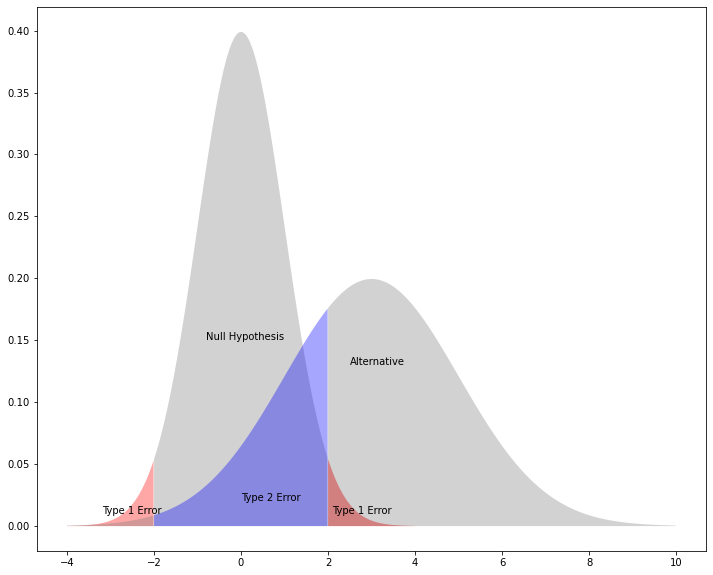

In [38]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

In the plot above, the red areas indicate type I errors assuming the alternative hypothesis is not different from the null for a two-sided test with a 95% confidence level.

The blue area represents type II errors that occur when the alternative hypothesis is different from the null, as shown by the distribution on the right. Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level. We can calculate the type II error rate for the distributions above as follows:

In [ ]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.

### Statistical Power

The power) of a statistical test is the probability that the test rejects the null hypothesis when the alternative is actually different from the null. In other words, power is the probability that the test detects that there is something interesting going on when there actually is something interesting going on. Power is equal to one minus the type II error rate. The power of a statistical test is influenced by:

The significance level chosen for the test.
The sample size.
The effect size of the test.
When choosing a significance level for a test, there is a trade-off between type I and type II error. A low significance level, such as 0.01 makes a test unlikely to have type I errors (false positives), but more likely to have type II errors (false negatives) than a test with larger value of the significance level α. A common convention is that a statistical tests should have a power of at least 0.8.

A larger sample size reduces the uncertainty of the point estimate, causing the sample distribution to narrow, resulting in lower type II error rates and increased power.

Effect size is a general term that describes a numeric measure of the size of some phenomenon. There are many different effect size measurements that arise in different contexts. In the context of the T-test, a simple effect size is the difference between the means of the samples. This number can be standardized by dividing by the standard deviation of the population or the pooled standard deviation of the samples. This puts the size of the effect in terms of standard deviations, so a standardized effect size of 0.5 would be interpreted as one sample mean being 0.5 standard deviations from another (in general 0.5 is considered a "large" effect size).

Since statistical power, the significance level, the effect size and the sample size are related, it is possible to calculate any one of them for given values of the other three. This can be an important part of the process of designing a hypothesis test and analyzing results. For instance, if you want to conduct a test with a given significance level (say the standard 0.05) and power (say the standard 0.8) and you are interested in a given effect size (say 0.5 for standardized difference between sample means), you could use that information to determine how large of a sample size you need.

In python, the statsmodels library contains functions to solve for any one parameter of the power of T-tests. Use statsmodels.stats.power.tt_solve_power for one sample t-tests and statsmodels.stats.power.tt_ind_solve_power for a two sample t-test. Let's check the sample size we should use need to use given the standard parameter values above for a one sample t-test:

In [ ]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size = 0.5,
               alpha = 0.05,
               power = 0.8)

In this case, we would want a sample size of at least 34 to make a study with the desired power and signifiance level capable of detecting a large effect size.

# Wrap Up

The t-test is a powerful tool for investigating the differences between sample and population means. T-tests operate on numeric variables; in the next lesson, we'll discuss statistical tests for categorical variables.